In [1]:
import paddle
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
Batch = 0
Batchs = []
all_train_accs = []
def draw_train_acc(Batchs, train_accs):
    title = "training accs"
    plt.title(title, fontsize=24)
    plt.xlabel("batch", fontsize=14)
    plt.ylabel("acc", fontsize=14)
    plt.plot(Batchs, train_accs, color="green", label='training accs')
    plt.legend()
    plt.grid()
    plt.show()
    
all_train_loss=[]
def draw_train_loss(Batchs, train_loss):
    title = "training loss"
    plt.title(title, fontsize=24)
    plt.xlabel("batch", fontsize=14)
    plt.ylabel("loss", fontsize=14)
    plt.plot(Batchs, train_loss, color='red', label='training loss')
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
uci_housing = paddle.text.datasets.UCIHousing(mode='train')
for i in range(10):
    feature, target = uci_housing[i]
    feature = paddle.to_tensor(feature)
    target = paddle.to_tensor(target)
    print(feature, target)

Tensor(shape=[13], dtype=float32, place=Place(cpu), stop_gradient=True,
       [-0.04054410,  0.06636363, -0.32356226, -0.06916996, -0.03435197,
         0.05563625, -0.03475696,  0.02682186, -0.37171334, -0.21419305,
        -0.33569506,  0.10143217, -0.21172912]) Tensor(shape=[1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [24.])
Tensor(shape=[13], dtype=float32, place=Place(cpu), stop_gradient=True,
       [-0.04030818, -0.11363637, -0.14907546, -0.06916996, -0.17632729,
         0.02612869,  0.10633469,  0.10658070, -0.32823509, -0.31724647,
        -0.06973761,  0.10143217, -0.09693883]) Tensor(shape=[1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [21.60000038])
Tensor(shape=[13], dtype=float32, place=Place(cpu), stop_gradient=True,
       [-0.04030840, -0.11363637, -0.14907546, -0.06916996, -0.17632729,
         0.17251688, -0.07698148,  0.10658070, -0.32823509, -0.31724647,
        -0.06973761,  0.09116942, -0.23794325]) Tensor(shape=[1], dtype=

In [4]:
train_dataset=paddle.text.datasets.UCIHousing(mode='train')
eval_dataset=paddle.text.datasets.UCIHousing(mode='test')
train_loader=paddle.io.DataLoader(train_dataset, batch_size=32, shuffle=True)
eval_loader=paddle.io.DataLoader(eval_dataset, batch_size=8, shuffle=False)

## 网络搭建

In [5]:
class MyDNN(paddle.nn.Layer):
    def __init__(self):
        super(MyDNN, self).__init__()
        self.linear = paddle.nn.Linear(13, 1, None)
        
    def forward(self, inputs):
        x = self.linear(inputs)
        return x

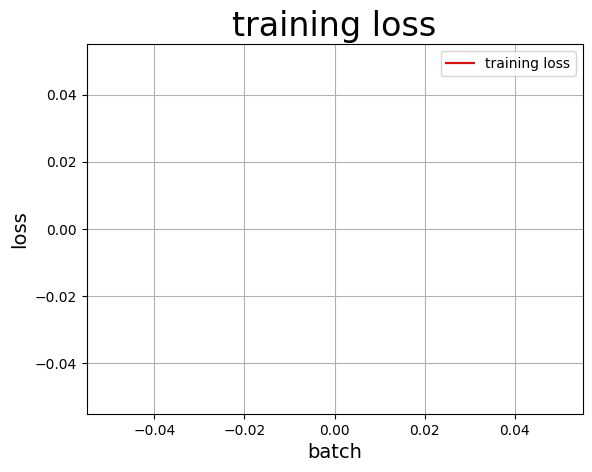

In [6]:
model = MyDNN()
model.train()
mse_loss = paddle.nn.MSELoss()
opt = paddle.optimizer.SGD(learning_rate=0.00005, parameters=model.parameters())
epochs_num = 200

for epochs in range(epochs_num):
    for batch_id, data in enumerate(train_loader):
        feature = data[0]
        label = data[1]
        predict = model(feature)
        loss = mse_loss(predict, label)
        if batch_id != 0 and batch_id % 20 == 0:
            Batch = Batch + 20
            Batchs.append(Batch)
            all_train_accs.append(loss.numpy()[0])
            print("epoch:{},step:{},train_loss:{}".format(epochs, batch_id, loss.numpy()))
        loss.backward()#反向传播
        opt.step()#使用优化器
        opt.clear_grad()#优化器清空梯度
paddle.save(model.state_dict(), "mydnn")
draw_train_loss(Batchs, all_train_loss)
        